In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor  # Importing Random Forest
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [28]:
# Importing data
df = pd.read_csv('diabetes.csv') 

# Creating feature variables
X = df.drop('y', axis=1) 
y = df['y'] 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use the scaled data for train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest model with max_depth parameter
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict
rf_predictions = rf_model.predict(X_test)


In [31]:
from sklearn.metrics import r2_score

# Compute R^2 score
r2 = r2_score(y_test, rf_predictions)

# Print results
print('Random Forest Regression Results:')
print('Mean Squared Error:', mean_squared_error(y_test, rf_predictions)) 
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_predictions)) 
print('R² Score:', r2)

Random Forest Regression Results:
Mean Squared Error: 3534.576332439038
Mean Absolute Error: 47.47953558110021
R² Score: 0.4303596834419844


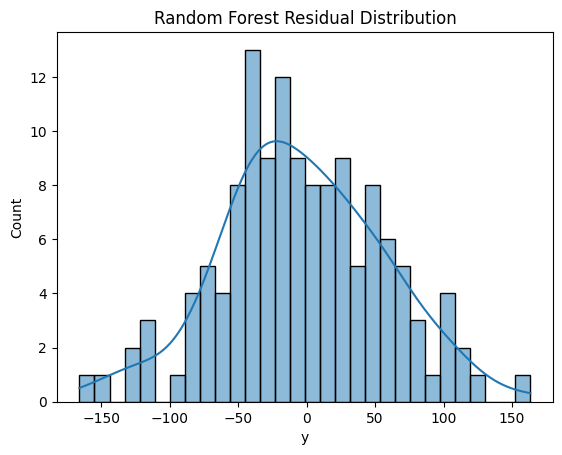

In [32]:
# Residual Plot (to check error distribution)
rf_residuals = y_test - rf_predictions
sns.histplot(rf_residuals, kde=True, bins=30)
plt.title("Random Forest Residual Distribution")
plt.show()


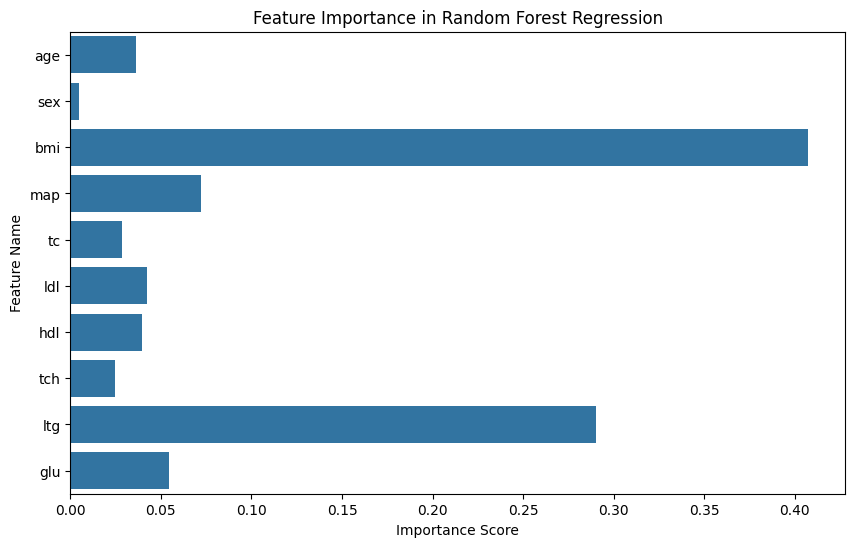

In [33]:
importances = rf_model.feature_importances_  # Get feature importances
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Random Forest Regression")
plt.show()

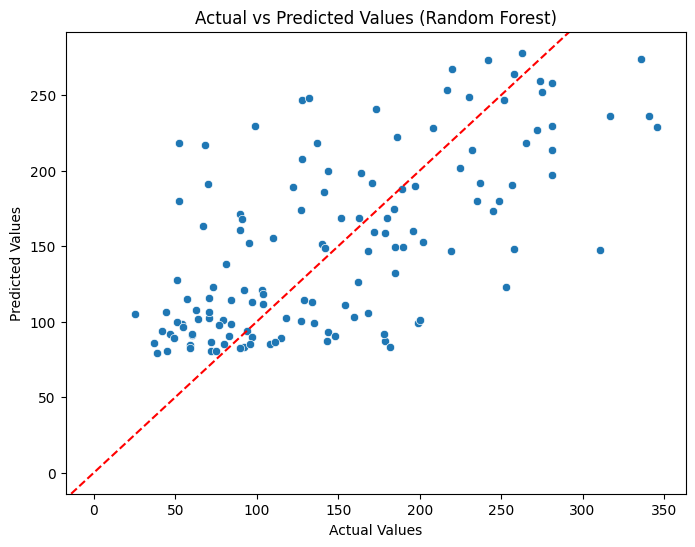

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Random Forest)")
plt.axline([0, 0], [1, 1], color='red', linestyle='--')  # Ideal fit line
plt.show()


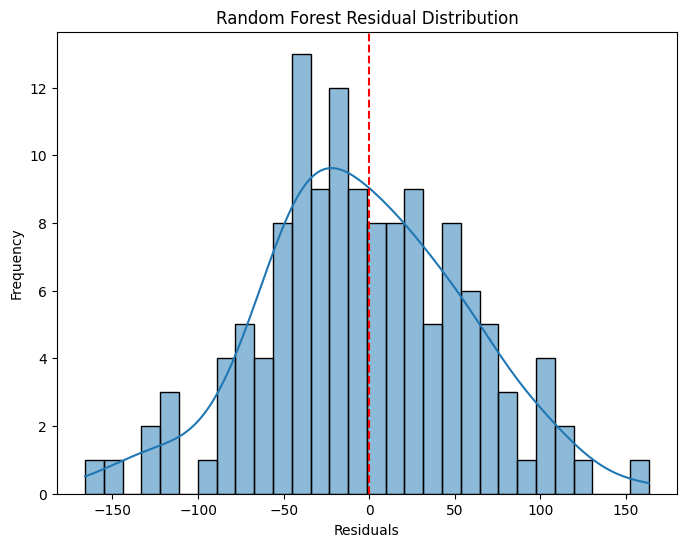

In [35]:
rf_residuals = y_test - rf_predictions

plt.figure(figsize=(8, 6))
sns.histplot(rf_residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')  # Centered at zero
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Random Forest Residual Distribution")
plt.show()


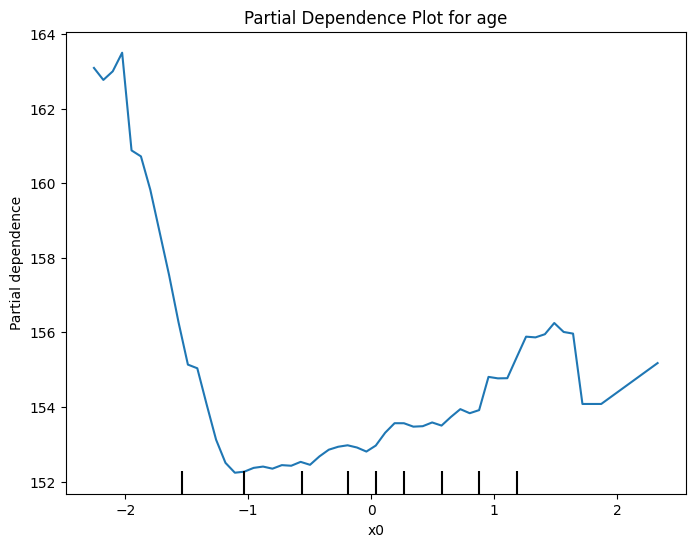

In [36]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(rf_model, X_train, features=[0], ax=ax)  # Change `features=[0]` to any feature index
plt.title(f"Partial Dependence Plot for {X.columns[0]}")
plt.show()


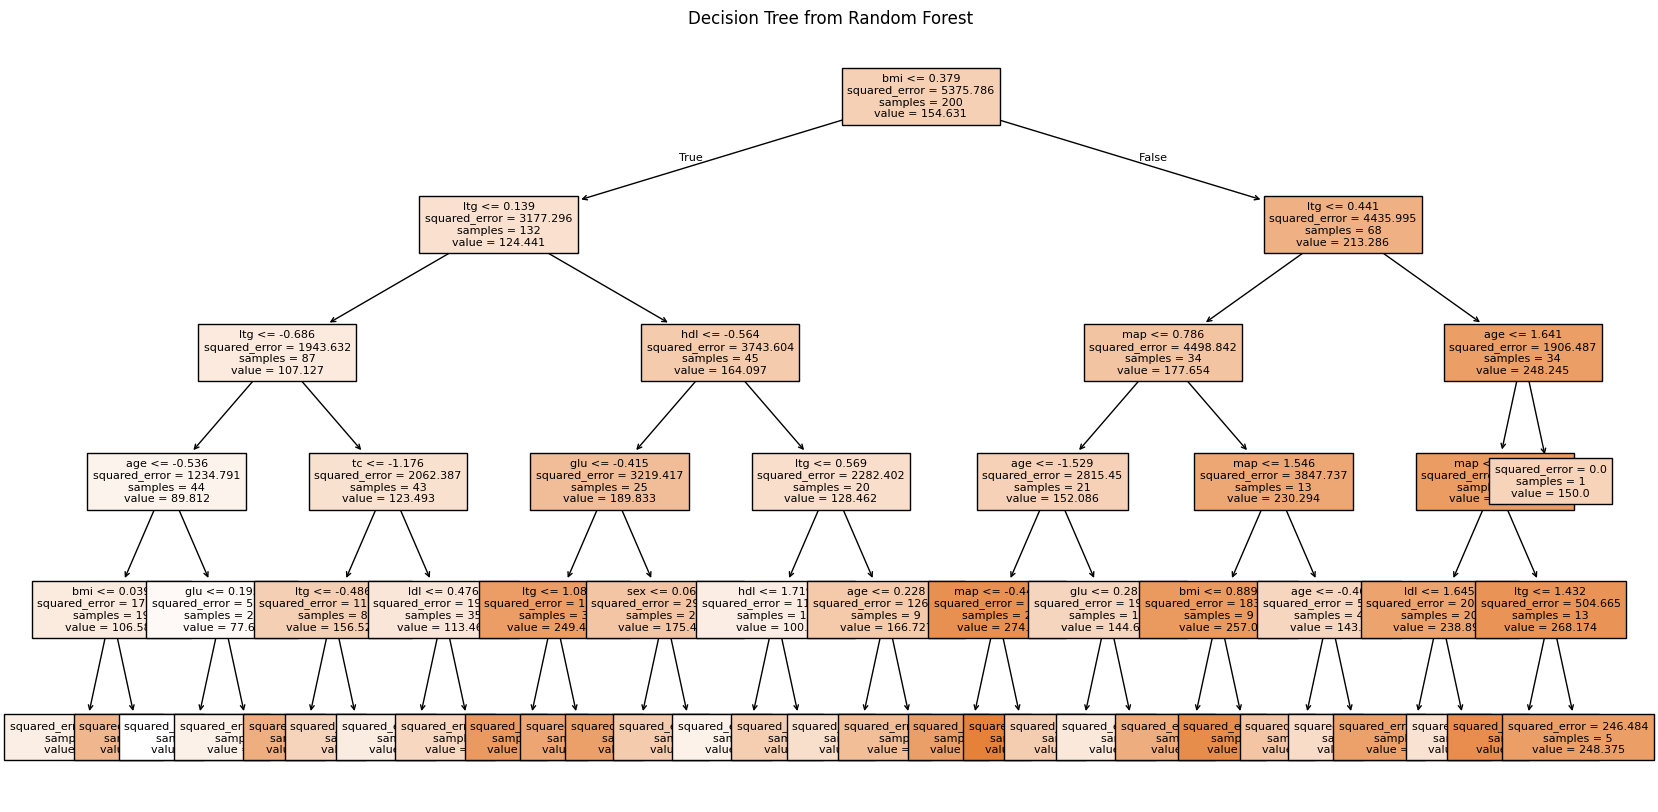

In [37]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, filled=True, fontsize=8)
plt.title("Decision Tree from Random Forest")
plt.show()
